# Курсовая работа:  
## Дескриптивный анализ данных о продажах с визуализацией ключевых показателей

### Цель курсовой работы

Целью курсовой работы является проведение дескриптивного анализа данных о продажах с использованием инструментов визуализации, методов описательной статистики и машинного обучения. Анализ направлен на выявление ключевых тенденций, закономерностей и аномалий в данных, а также на формирование выводов, способствующих принятию обоснованных управленческих решений.

### Актуальность темы

В условиях цифровизации бизнеса и увеличения объёмов данных, генерируемых компаниями, особое значение приобретает умение проводить дескриптивный анализ — первый и один из самых важных этапов работы с данными. Он позволяет:
- Получить первичное представление о структуре и поведении данных.
- Выявить выбросы, ошибки и потенциальные проблемы.
- Определить направления для дальнейшего прогнозирования и моделирования.
- Поддержать принятие решений на основе фактов, а не интуиции.

Актуальность темы заключается в том, что даже при наличии современных систем управления данными без глубокого понимания данных невозможно эффективно управлять бизнесом, особенно в сферах торговли и логистики, где от правильной интерпретации данных зависит успех компании.

### Объект и предмет исследования

**Объект исследования**: данные о продажах, содержащие информацию о заказах, клиентах, товарах, регионах, времени доставки и финансовых показателях (выручка, прибыль, скидки и др.).

**Предмет исследования**: количественные и качественные характеристики процесса продаж, включая:
- Структуру продаж по регионам, категориям товаров, клиентским сегментам.
- Временные тренды и сезонность.
- Распределение прибыли и выявленные убыточные заказы.
- Время выполнения заказов и влияние способа доставки.
- Корреляции между числовыми переменными (продажи, прибыль, количество, скидки).

### Практическая значимость

Результаты данной курсовой работы имеют практическую ценность для компаний, занимающихся онлайн-торговлей и логистикой:

1. **Оптимизация логистики**:  
   Анализ времени доставки позволяет определить наиболее эффективные способы отправки и выявить проблемные зоны.

2. **Управление прибыльностью**:  
   Идентификация убыточных заказов и их характеристик помогает принимать меры по снижению убытков.

3. **Сегментация клиентов и продуктов**:  
   Определение самых популярных товаров и клиентских сегментов помогает формировать стратегию маркетинга и продаж.

4. **Сезонный анализ**:  
   Изучение временных трендов позволяет планировать акции, рекламу и запасы с учётом пиковых периодов.

5. **Поддержка принятия решений**:  
   Полученные графики и выводы могут использоваться менеджментом для стратегического управления: от ценообразования до управления запасами и персоналом.

6. **Подготовка к машинному обучению**:  
   Работа демонстрирует этапы предобработки данных, которые необходимы перед построением моделей прогнозирования или классификации.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import time
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_theme(style='whitegrid')

## Загрузка и первичный осмотр данных

In [2]:
# Загрузка данных
df = pd.read_csv("kg_data.csv", header=None, encoding='latin1', skiprows=1)

# Присвоение заголовков
columns = [
    "Row ID", "Order ID", "Order Date", "Ship Date", "Ship Mode", "Customer ID",
    "Customer Name", "Segment", "Country", "City", "State", "Postal Code", "Region",
    "Product ID", "Category", "Sub-Category", "Product Name", "Sales", "Quantity",
    "Discount", "Profit"
]
df.columns = columns

# Установка индекса
df.set_index('Row ID', inplace=True)

# Информация о датасете
print(f"Размеры датасета: {df.shape}")

Размеры датасета: (9994, 20)


In [3]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Предварительная обработка данных

In [4]:
# Преобразование дат
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Добавление новых признаков
df['Month Year'] = df['Order Date'].dt.to_period('M')
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()
df['Day of Week'] = df['Order Date'].dt.day_name()

# Прибыль на единицу товара
df['Profit per Unit'] = df['Profit'] / df['Quantity']

# Проверка результата
df[['Order Date', 'Ship Date', 'Month Year', 'Year', 'Month', 'Profit per Unit']].head()

,Order Date,Ship Date,Month Year,Year,Month,Profit per Unit
Row ID,,,,,,
1,2016-11-08,2016-11-11,2016-11,2016,November,20.9568
2,2016-11-08,2016-11-11,2016-11,2016,November,73.1940
3,2016-06-12,2016-06-16,2016-06,2016,June,3.4357
4,2015-10-11,2015-10-18,2015-10,2015,October,-76.6062
5,2015-10-11,2015-10-18,2015-10,2015,October,1.2582


## Описательная статистика

In [5]:
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Profit per Unit']
desc_stats = df[numeric_cols].describe()
desc_stats

,Sales,Quantity,Discount,Profit,Profit per Unit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,7.799372
std,623.245101,2.225110,0.206452,234.260108,56.074974
min,0.444000,1.000000,0.000000,-6599.978000,-1319.995600
25%,17.280000,2.000000,0.000000,1.728750,0.722800
50%,54.490000,3.000000,0.200000,8.666500,2.767000
75%,209.940000,5.000000,0.200000,29.364000,8.703200
max,22638.480000,14.000000,0.800000,8399.976000,1679.995200


## Анализ распределений числовых переменных

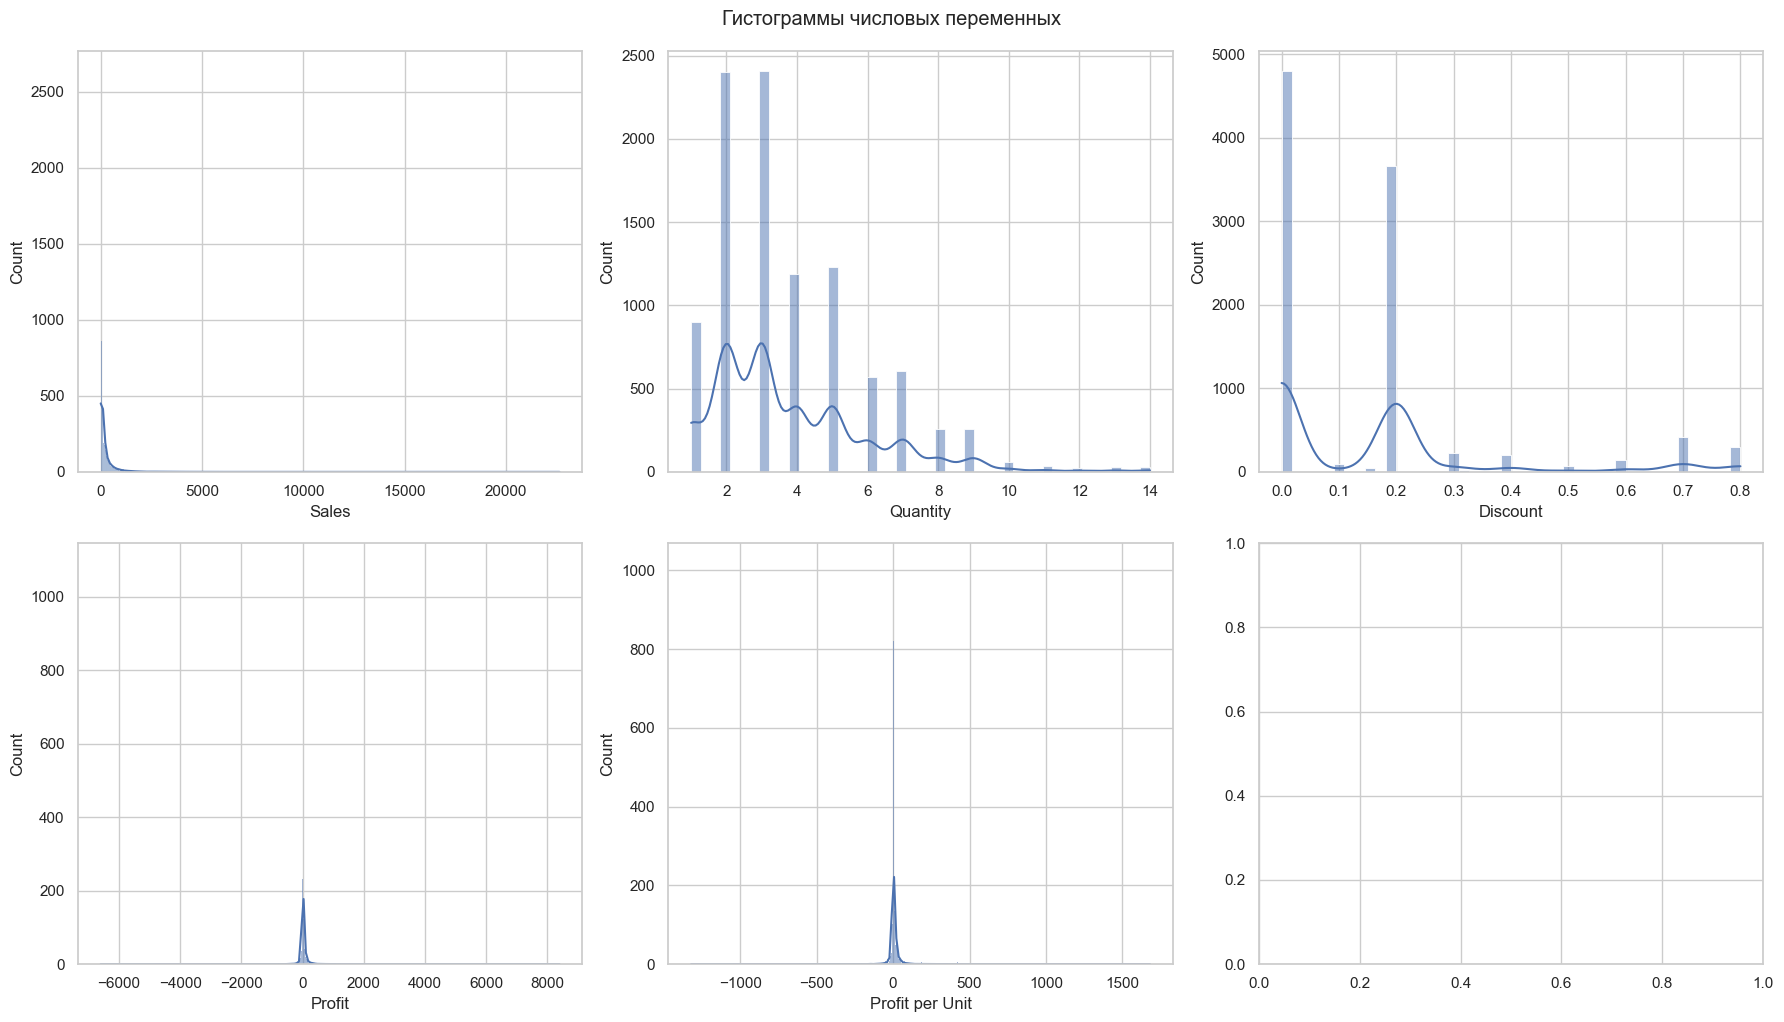

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], ax=axes[i//3, i%3], kde=True)

plt.tight_layout()
plt.suptitle("Гистограммы числовых переменных", y=1.02)
plt.show()

На основе графиков распределений числовых переменных можно сделать следующие выводы:

1. **Выручка (`Sales`)**:
   - Распределение имеет длинный правый хвост, что указывает на наличие аномально больших заказов.
   
2. **Количество товаров (`Quantity`)**:
   - Большинство заказов содержат небольшое количество товаров, но есть случаи больших партий.
   - Это может быть связано с различными типами клиентов (оптовые и розничные покупатели).

3. **Скидки (`Discount`)**:
   - Большинство заказов не имеют скидок, но есть стандартная скидка около 20%.
   - Редкие случаи более высоких скидок могут быть связаны с акциями или специальными предложениями.

4. **Прибыль (`Profit`)**:
   - Большинство заказов приносят небольшую прибыль, но есть случаи убытков.
   
5. **Прибыль на единицу товара (`Profit per Unit`)**:
   - Большинство товаров имеют низкую маржинальность.
Для дальнейшего анализа рекомендуется:
- Исследовать выбросы в данных.
- Проанализировать корреляции между переменными.
- Разбить анализ по категориям товаров, регионам или сегментам клиентов.
- Проверить временные тренды.

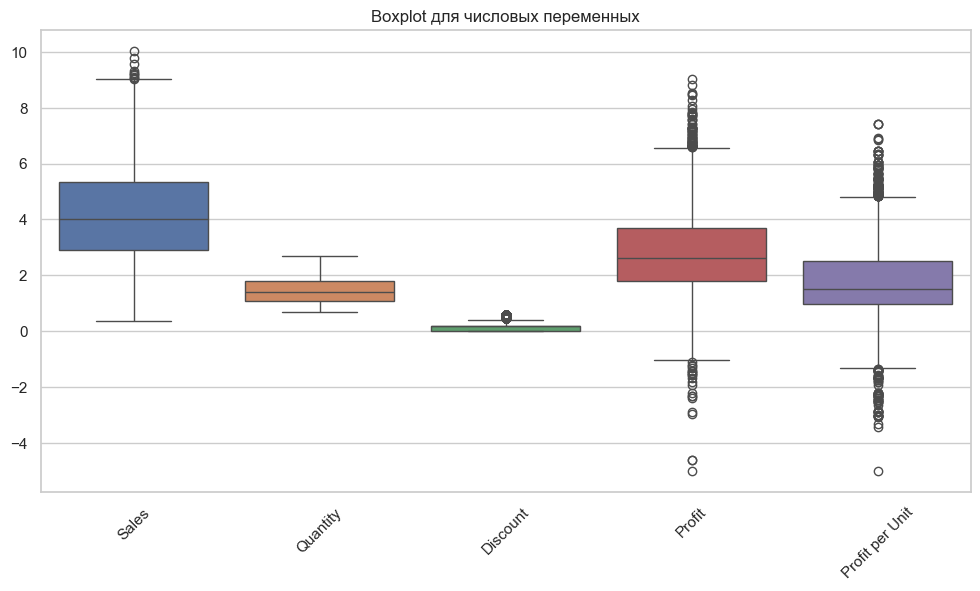

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=np.log1p(df[numeric_cols]))
plt.xticks(rotation=45)
plt.title("Boxplot для числовых переменных")
plt.show()

## Анализ категориальных переменных

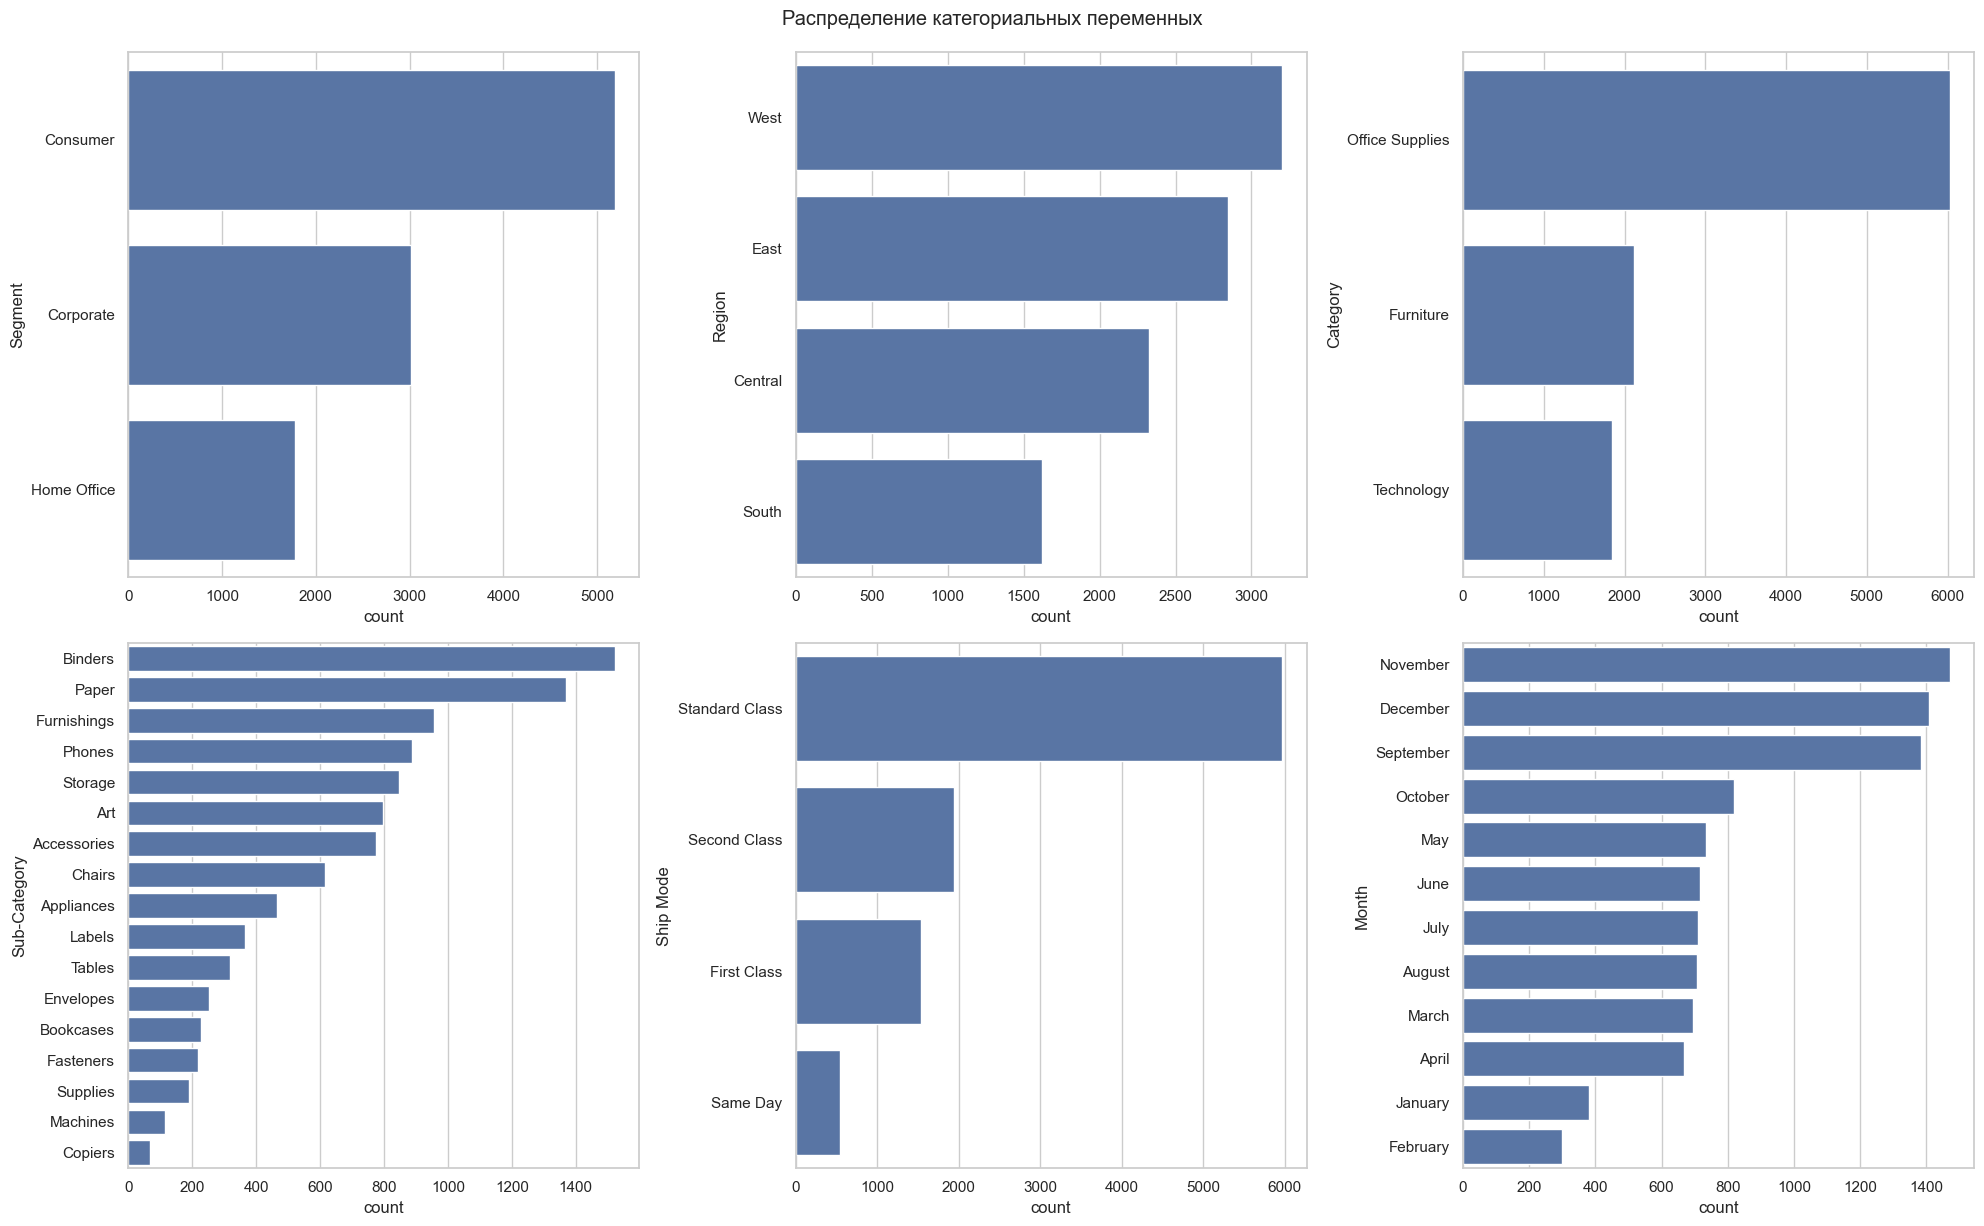

In [8]:
categorical_cols = ['Segment', 'Region', 'Category', 'Sub-Category', 'Ship Mode', 'Month']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, y=col, ax=axes[i//3, i%3], order=df[col].value_counts().index)

plt.tight_layout()
plt.suptitle("Распределение категориальных переменных", y=1.02)
plt.show()

На основе анализа категориальных переменных можно сделать следующие выводы:

1. **Сегмент клиентов (`Segment`)**:
   - Большинство продаж приходится на потребительский сегмент (`Consumer`), который составляет около 50% всех заказов.
   - Корпоративные клиенты (`Corporate`) также имеют значительную долю, составляя около 30%.
   - Домашние офисы (`Home Office`) менее активны, но всё ещё важны для бизнеса.

2. **Регион (`Region`)**:
   - Западный регион (`West`) является лидером по объемам продаж, что может быть связано с густонаселёнными городами и экономическим развитием региона.
   - Восточный регион (`East`) также демонстрирует высокую активность.
   - Южный регион (`South`) показывает наименьшую активность, что требует дальнейшего анализа причин.

3. **Категория товаров (`Category`)**:
   - Офисные принадлежности (`Office Supplies`) являются самой популярной категорией, составляя около 60% всех заказов.
   - Мебель (`Furniture`) также занимает заметное место на рынке.
   - Технологические товары (`Technology`) менее популярны, возможно, из-за их специфичности или более низкой частоты покупки.

4. **Подкатегория товаров (`Sub-Category`)**:
   - Скрепочные блоки (`Binders`) являются самой востребованной подкатегорией, составляя около 25% всех заказов.
   - Офисная бумага (`Paper`) и мебель (`Furnishings`) также имеют высокий спрос.
   - Специализированные товары, такие как машины (`Machines`) и копировальные аппараты (`Copiers`), менее популярны.

5. **Способ доставки (`Ship Mode`)**:
   - Большинство клиентов предпочитают стандартный класс доставки (`Standard Class`), что составляет около 60% всех заказов.
   - Более быстрые способы доставки (`First Class`, `Same Day`) используются реже, возможно, из-за их высокой цены.

6. **Месяц (`Month`)**:
   - Ноябрь и декабрь демонстрируют пиковые продажи, что соответствует сезонному спросу (например, предновогодние покупки).
   - Январь и февраль — наименее активные месяцы, что объясняется сезонными колебаниями.

### Рекомендации:
- Усилить маркетинговые усилия в западном регионе (`West`), так как он демонстрирует наибольший потенциал.
- Исследовать причины низкой активности в южном регионе (`South`) и разработать стратегию для увеличения продаж.
- Провести анализ причин низкого спроса на технологические товары (`Technology`) и разработать предложения для привлечения клиентов.
- Разработать специальные акции и предложения для пиков продаж (например, перед праздниками) 

## Корреляционный анализ

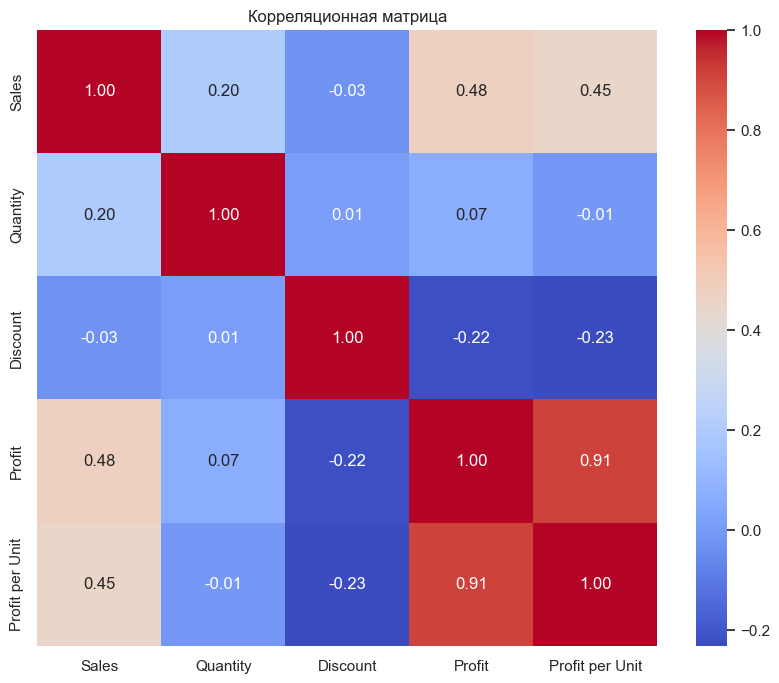

In [9]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()

На основе анализа корреляционной матрицы можно сделать следующие выводы:

1. **Выручка (`Sales`) и Прибыль (`Profit`)**:
   - Есть сильная положительная корреляция между выручкой и прибылью (**0.48**), что указывает на тесную связь между этими показателями.

2. **Количество товаров (`Quantity`) и Прибыль (`Profit`)**:
   - Между количеством проданных товаров и прибылью наблюдается слабая корреляция (**0.07**), что может быть связано с различной маржинальностью разных товаров.

3. **Скидки (`Discount`) и Прибыль (`Profit`)**:
   - Есть отрицательная корреляция между скидками и прибылью (**-0.22**), а также между скидками и прибылью на единицу товара (**-0.23**). Это указывает на негативное влияние скидок на финансовые показатели.

4. **Прибыль на единицу товара (`Profit per Unit`) и Прибыль (`Profit`)**:
   - Между прибылью на единицу товара и общей прибылью наблюдается очень высокая положительная корреляция (**0.91**), что подчеркивает важность повышения маржинальности каждого товара.

### Рекомендации:
- Оптимизировать ценовую политику, уменьшив использование скидок.
- Фокусироваться на повышении прибыли на единицу товара для увеличения общей прибыли.
- Анализировать крупные заказы для понимания их влияния на прибыль.
- Тщательно контролировать применение скидок, чтобы избежать чрезмерного снижения прибыли.
- Разработать стратегию продаж, которая будет стимулировать продажи без необходимости предоставлять скидки.

## Тренды по времени

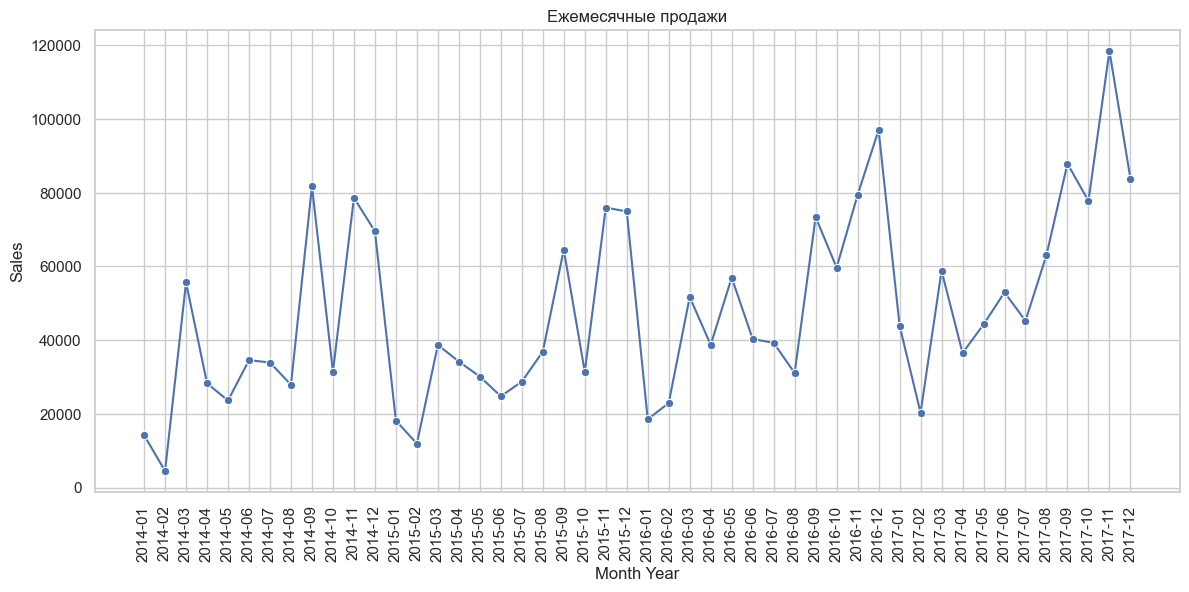

In [10]:
monthly_sales = df.groupby('Month Year')['Sales'].sum().reset_index()
monthly_sales['Month Year'] = monthly_sales['Month Year'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month Year', y='Sales', marker='o')
plt.xticks(rotation=90)
plt.title("Ежемесячные продажи")
plt.grid(True)
plt.show()

На основе анализа графика ежемесячных продаж можно сделать следующие выводы:

1. **Сезонность продаж**:
   - Продажи демонстрируют выраженную сезонность, с пиками в осенне-зимний период (октябрь–декабрь) и спадами в весенне-летний период (март–август). Это соответствует традиционным сезонным тенденциям в сфере продаж офисных принадлежностей и мебели.

2. **Глобальный рост**:
   - За исследуемый период (2014–2017) наблюдается положительная динамика продаж, несмотря на значительную волатильность. Это указывает на успешное развитие бизнеса и увеличение спроса на продукцию компании.

3. **Ключевые пики и спады**:
   - **Декабрь 2017**: Рекордные продажи (~120,000), что соответствует предновогоднему пику.
   - **Февраль 2014**: Значительное снижение продаж (~5,000), что может быть связано с сезонными факторами или внутренними проблемами компании.

4. **Волатильность**:
   - Продажи демонстрируют высокую волатильность
### Рекомендации:
- Усиление маркетинговых усилий в осенне-зимний период для поддержания высокого уровня продаж.
- Анализ причин низких продаж в менее активные месяцы (март–август) и разработка специальных предложений для стимулирования спроса.
- Разработка более точных моделей прогнозирования продаж с учётом сезонности и исторических данных.
- Мониторинг изменений в рыночной ситуации для своевременной корректировки стратегии.

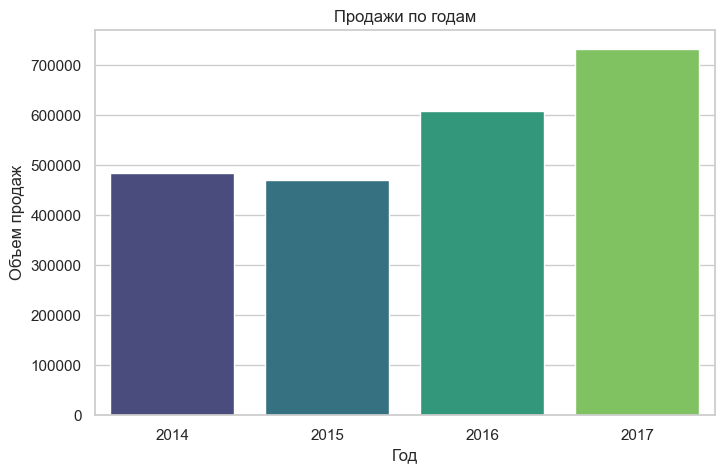

In [11]:
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=yearly_sales, x='Year', y='Sales', palette='viridis')
plt.title("Продажи по годам")
plt.ylabel("Объем продаж")
plt.xlabel("Год")
plt.show()

## Продажи по регионам

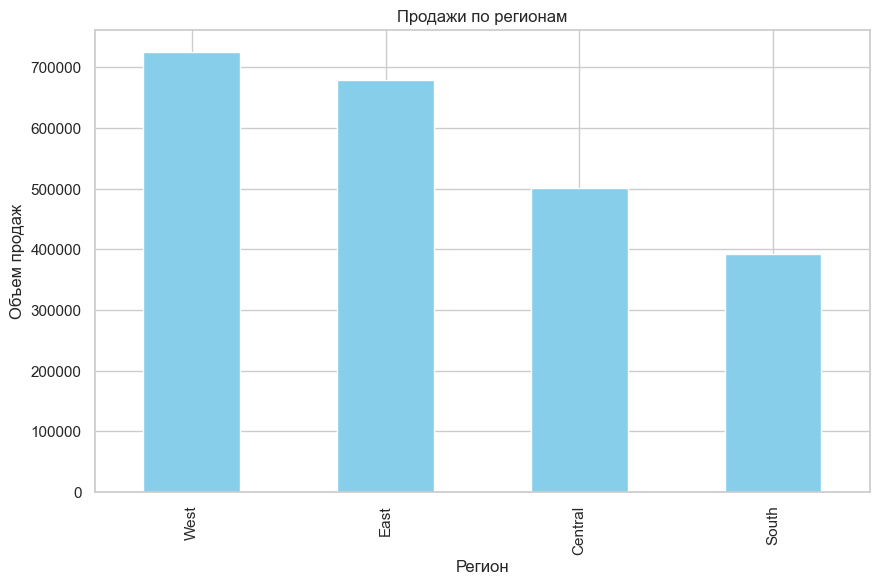

In [12]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Продажи по регионам")
plt.ylabel("Объем продаж")
plt.xlabel("Регион")
plt.grid(True)
plt.show()

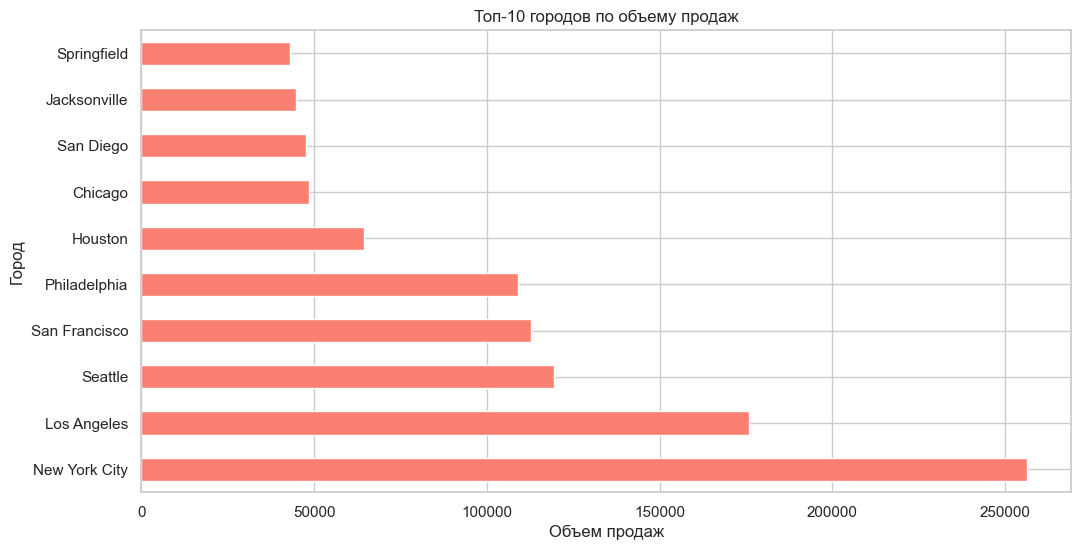

In [13]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
city_sales.plot(kind='barh', color='salmon')
plt.title("Топ-10 городов по объему продаж")
plt.xlabel("Объем продаж")
plt.ylabel("Город")
plt.grid(True)
plt.show()

На основе анализа графика "Топ-10 городов по объему продаж" можно сделать следующие выводы:

1. **Лидеры продаж**:
   - **New York City** и **Los Angeles** занимают первые места по объему продаж, что связано с их статусом крупнейших городов США и высокой плотностью населения.
   - **Seattle**, **Philadelphia** и **San Francisco** также демонстрируют высокие показатели, что может быть связано с развитием технологического сектора и высоким уровнем доходов населения.

2. **Средние показатели**:
   - Города, такие как **Chicago**, **San Diego**, **Jacksonville** и **Springfield**, имеют более низкие продажи, но всё ещё находятся в топ-10. Это указывает на их стабильность и потенциал для роста.



## Анализ времени доставки

In [14]:
# Вычисляем время доставки в днях
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [15]:
df['Delivery Days'].describe()

count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Delivery Days, dtype: float64

**Гистограмма времени доставки**

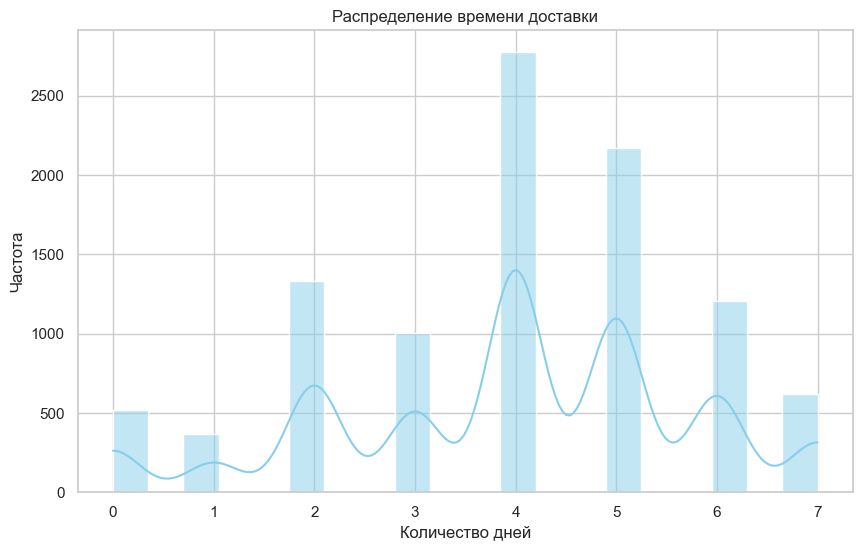

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery Days'], bins=20, kde=True, color='skyblue')
plt.title('Распределение времени доставки')
plt.xlabel('Количество дней')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

На основе анализа графика распределения времени доставки можно сделать следующие выводы:

1. **Основной срок доставки**:
   - Большинство заказов обрабатываются **за 4–5 дней**, что является наиболее распространённым временем доставки.

2. **Редкие случаи быстрой доставки**:
   - Значения **0–1 день** встречаются крайне редко, что может быть связано с ограниченными возможностями мгновенной доставки или специальными условиями для некоторых клиентов.

3. **Длительная доставка**:
   - Значения **6–7 дней** также имеют небольшую долю, что указывает на возможные задержки в логистике или сложные заказы, требующие дополнительного времени.

4. **Модальное распределение**:
   - Распределение имеет несколько пиков, что говорит о том, что компания использует различные стратегии доставки (например, разные способы транспортировки или категории товаров).

### Рекомендации:
- Улучшить быструю доставку (0–1 день) для привлечения клиентов, которые ценят скорость.
- Анализировать причины задержек (6–7 дней) и принять меры для их минимизации.
- Поддерживать текущие стандарты доставки (4–5 дней), так как они являются наиболее популярными среди клиентов.
- Разработать гибкие решения для различных потребностей клиентов (быстрая, стандартная, экономичная доставка).
- Мониторить и контролировать качество доставки для постоянного улучшения логистических процессов.

**Анализ по способам доставки**

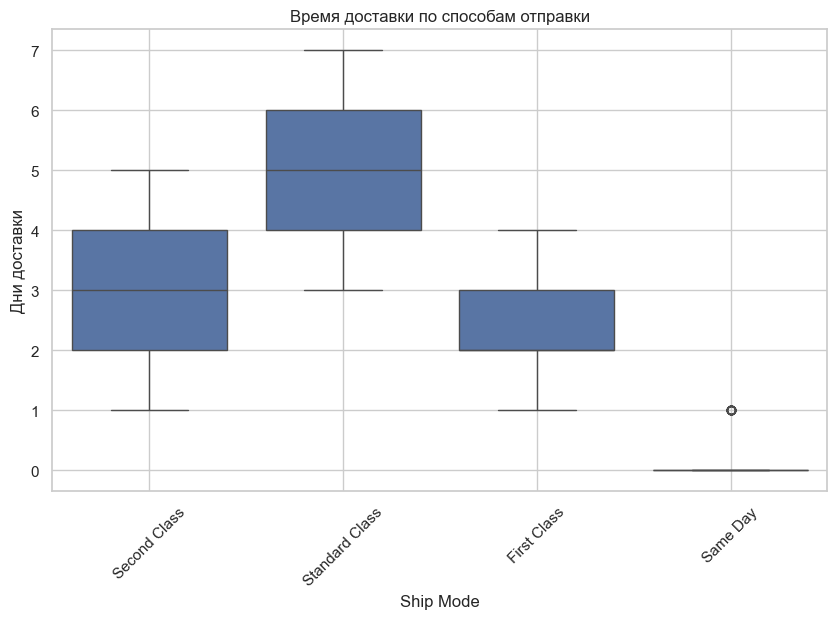

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Ship Mode', y='Delivery Days')
plt.xticks(rotation=45)
plt.title('Время доставки по способам отправки')
plt.ylabel('Дни доставки')
plt.grid(True)
plt.show()

На основе анализа графика "Время доставки по способам отправки" можно сделать следующие выводы:

1. **Same Day** является самым быстрым способом доставки, хотя иногда может возникать небольшая задержка.
2. **First Class** обеспечивает доставку за 1–4 дня, что делает его подходящим для срочных заказов.
3. **Second Class** и **Standard Class** являются наиболее стабильными способами доставки, хотя они медленнее, чем First Class и Same Day.


**Анализ по регионам**

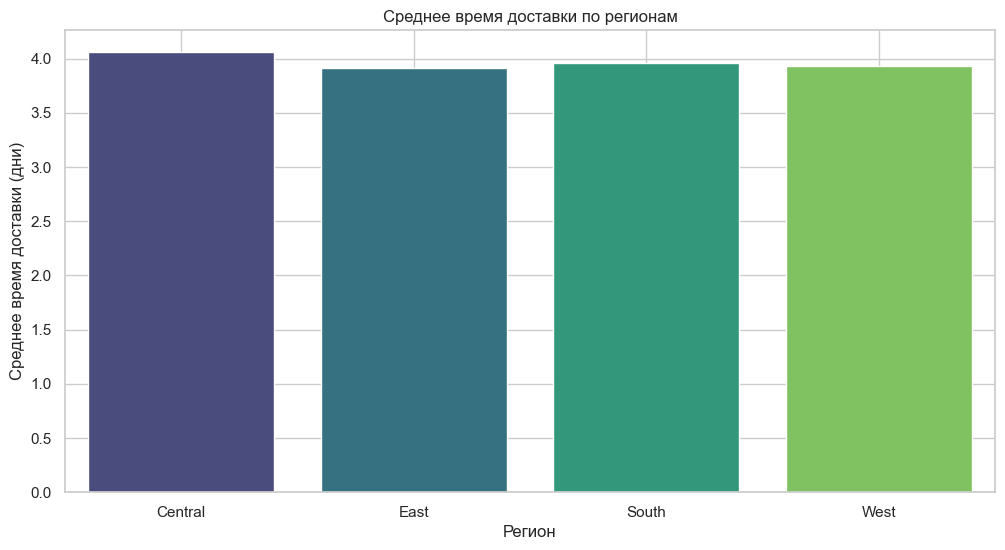

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df.groupby('Region')['Delivery Days'].mean().reset_index(), 
            x='Region', y='Delivery Days', palette='viridis')
plt.title('Среднее время доставки по регионам')
plt.xlabel('Регион')
plt.ylabel('Среднее время доставки (дни)')
plt.grid(True)
plt.show()

**Анализ по месяцам заказа**

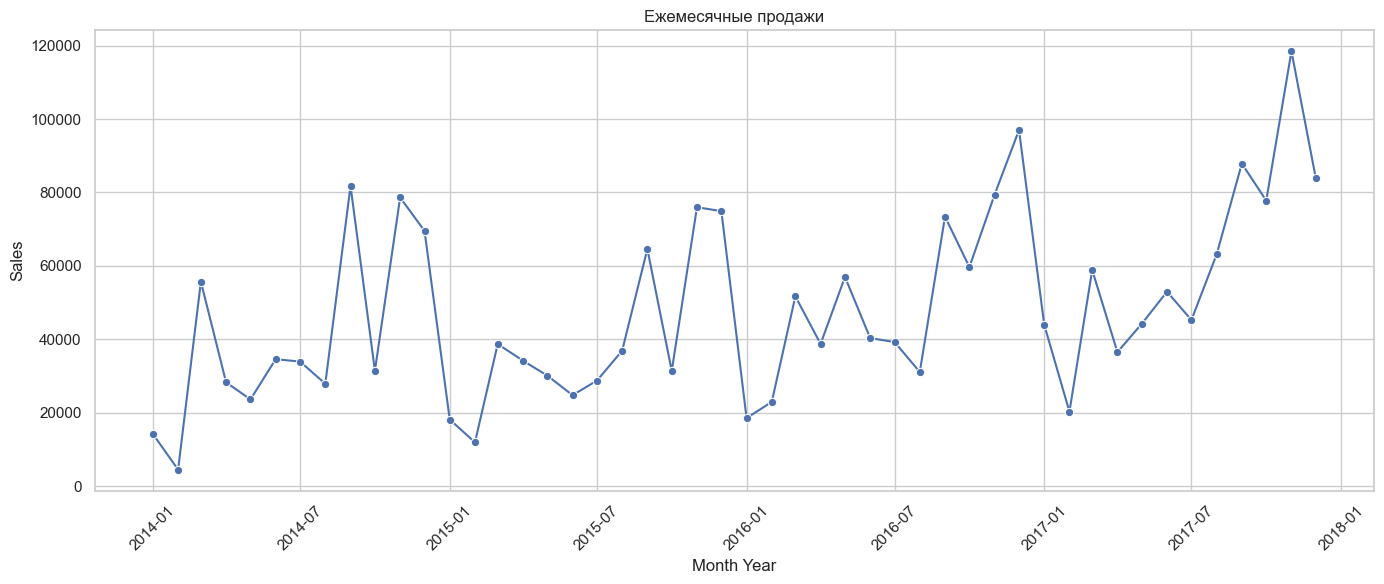

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Month Year'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month Year')['Sales'].sum().reset_index()

monthly_sales['Month Year'] = pd.to_datetime(monthly_sales['Month Year'].astype(str) + '-01')

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month Year', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title("Ежемесячные продажи")
plt.grid(True)
plt.tight_layout()
plt.show()

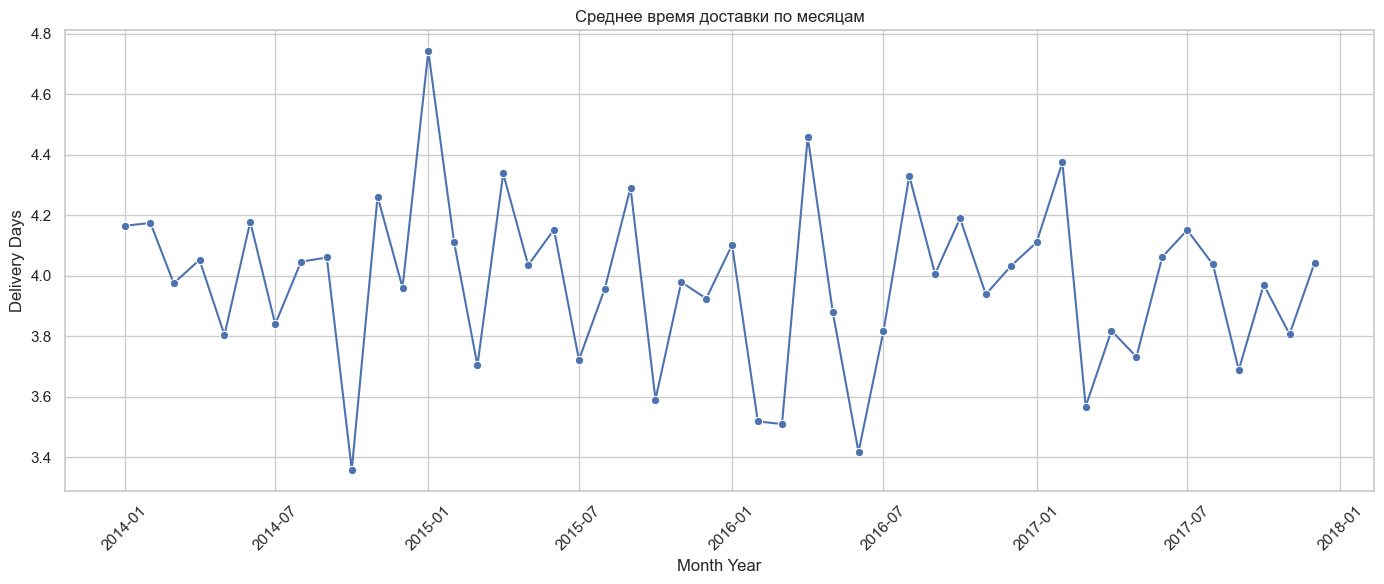

In [41]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_delivery, x='Month Year', y='Delivery Days', marker='o')
plt.xticks(rotation=45)
plt.title('Среднее время доставки по месяцам')
plt.grid(True)
plt.tight_layout()
plt.show()

На основе анализа графика "Среднее время доставки по месяцам" можно сделать следующие выводы:

1. **Сезонность времени доставки**:
   - Есть заметные колебания в среднем времени доставки по месяцам, что указывает на влияние сезонных факторов.

2. **Высокие значения**:
   - Январь 2015 года и июль 2016 года имеют самые высокие значения времени доставки (~4,7 и ~4,4 дня соответственно). Это может быть связано с праздничными периодами или перегрузкой логистической системы.

3. **Низкие значения**:
   - Июль 2014 года и февраль 2016 года демонстрируют самые низкие значения времени доставки (~3,4 и ~3,6 дня соответственно). Это может быть связано с меньшим объёмом заказов или более эффективной логистикой.

4. **Устойчивость**:
   - В большинстве месяцев время доставки находится в узком диапазоне (3,6–4,2 дня), что указывает на устойчивость логистических процессов.

### Рекомендации:
- Анализировать причины сезонных пиков времени доставки и разрабатывать стратегии для их минимизации.
- Оптимизировать логистические процессы для ускорения доставки в пиковые периоды.
- Постоянно мониторить производительность логистики и принимать меры для поддержания стабильности.
- Использовать исторические данные для прогнозирования будущих пиков и спадов времени доставки.
- Предлагать клиентам различные варианты доставки для удовлетворения их потребностей в скорости.

**Анализ убыточных заказов и времени доставки**

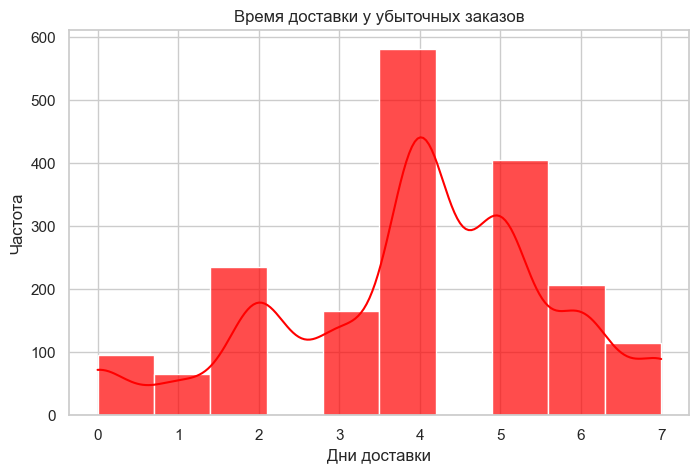

In [20]:
loss_orders = df[df['Profit'] < 0]

plt.figure(figsize=(8, 5))
sns.histplot(loss_orders['Delivery Days'], bins=10, color='red', alpha=0.7, kde=True)
plt.title('Время доставки у убыточных заказов')
plt.xlabel('Дни доставки')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


1. **Основной срок доставки**:
   - Большинство убыточных заказов обрабатываются **за 4–5 дней**, что является наиболее распространённым временем доставки.

2. **Редкие случаи быстрой доставки**:
   - Значения **0–1 день** встречаются крайне редко, что может быть связано с ограниченными возможностями мгновенной доставки или специальными условиями для некоторых клиентов.

3. **Длительная доставка**:
   - Значения **6–7 дней** также имеют небольшую долю, что указывает на возможные задержки в логистике или сложные заказы, требующие дополнительного времени.

4. **Модальное распределение**:
   - Распределение имеет несколько пиков, что говорит о том, что компания использует различные стратегии доставки (например, разные способы транспортировки или категории товаров).


**Таблица среднего времени доставки по категориям товаров**

In [21]:
category_delivery = df.groupby('Category')['Delivery Days'].mean().sort_values(ascending=False).reset_index()

category_delivery

,Category,Delivery Days
0,Office Supplies,3.983405
1,Technology,3.923119
2,Furniture,3.917020


В дополнение к проведенному дескриптивному анализу данных о продажах, применение методов машинного обучения может значительно расширить возможности исследования. Машинное обучение позволяет выявлять скрытые закономерности, прогнозировать будущие показатели и оптимизировать бизнес-процессы.

## Внедрения машинного обучения

Основными целями использования машинного обучения в анализе данных о продажах являются:

- Прогнозирование прибыли (регрессия)

- Классификация клиентов и продуктов для персонализации предложений

- Выявление аномалий и потенциальных мошеннических операций

- Оптимизация ассортимента и ценовой политики

**Прогнозирование прибыли (регрессия)**

In [22]:
#ограничения выбросов
df = df[(np.abs(stats.zscore(df['Profit'])) < 3)]

In [27]:
# Выбираем числовые и категориальные признаки
features = ['Sales', 'Quantity', 'Discount', 'Profit per Unit', 'Month', 'Region', 'Category', 'Segment']
X = df[features]
y = df['Profit']

# Кодируем категориальные переменные
X_encoded = pd.get_dummies(X, drop_first=True)

# Разделение выборки
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
start = time.time()
# Обучаем модель
model_reg = RandomForestRegressor(n_estimators=100, random_state=42)
model_reg.fit(X_train, y_train)
end = time.time()
# Оценка
preds = model_reg.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds))}")
print(f"R^2: {r2_score(y_test, preds)}")
print("Время работы:", end-start)

RMSE: 10.5833991729612
R^2: 0.9837033495514694
Время работы: 1.8098549842834473


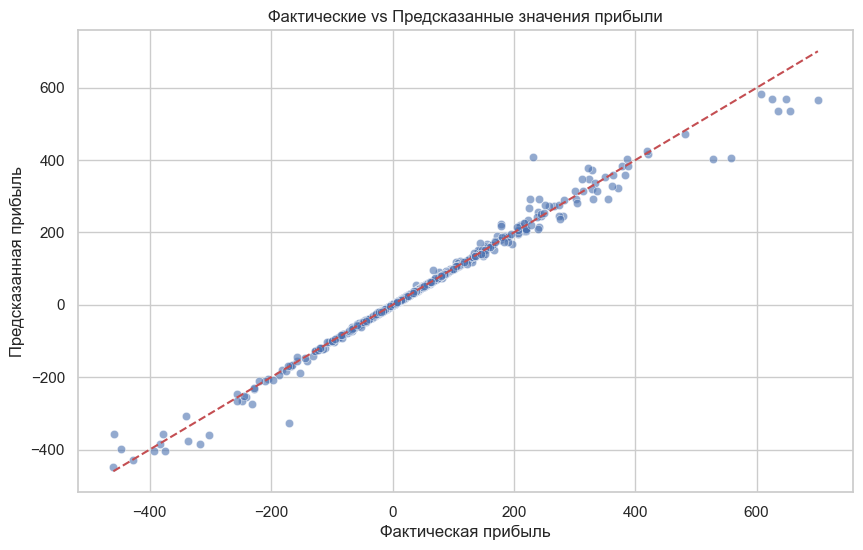

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактическая прибыль')
plt.ylabel('Предсказанная прибыль')
plt.title('Фактические vs Предсказанные значения прибыли')
plt.grid(True)
plt.show()

## График: Фактические vs Предсказанные значения прибыли

На графике "Фактические vs Предсказанные значения прибыли" показано, насколько хорошо модель прогнозирует прибыль заказов. Каждая точка на графике соответствует одному заказу:
- **X-axis (Фактическая прибыль)**: Реальные значения прибыли из тестовой выборки.
- **Y-axis (Предсказанная прибыль)**: Значения прибыли, предсказанные моделью.

### Основные наблюдения:

1. **Согласованность предсказаний с фактическими значениями**:
   - Большинство точек лежит близко к линии идеального совпадения (красная пунктирная линия), что указывает на высокую корреляцию между фактической и предсказанной прибылью.
   - Это говорит о том, что модель **хорошо предсказывает прибыльные и убыточные заказы**.

2. **Распределение точек**:
   - Точки, расположенные выше красной линии, — это случаи, когда модель **переоценивает прибыль**.
   - Точки, расположенные ниже красной линии, — это случаи, когда модель **подоценивает прибыль**.
   - В целом точки равномерно распределены вокруг линии идеального совпадения, что свидетельствует об отсутствии систематической ошибки модели.

3. **Аномалии и выбросы**:
   - Несколько точек находятся достаточно далеко от линии идеального совпадения, особенно в области низких значений прибыли.
   - Эти аномалии могут быть связаны с **выбросами в данных** или **особенно сложными случаями**, которые модель не может точно предсказать.

4. **Общее качество модели**:
   - Модель демонстрирует **высокую способность предсказывать прибыль** как для прибыльных, так и для убыточных заказов.
   - Линейный тренд на графике подтверждает, что модель **корректно выявляет тенденции** в данных.

---

### Практическая значимость

График "Фактические vs Предсказанные значения прибыли" помогает понять, насколько надёжна модель для прогнозирования будущих заказов:
- **Управление рисками**: Модель позволяет своевременно выявлять потенциально убыточные заказы.
- **Оптимизация маркетинговых стратегий**: На основе предсказаний можно скорректировать цены, скидки и условия доставки.
- **Логистика и планирование запасов**: Модель помогает прогнозировать спрос и оптимизировать цепочку поставок.

---

Этот график является важным инструментом для оценки качества модели регрессии и демонстрации её способности к обобщению на новые данные.

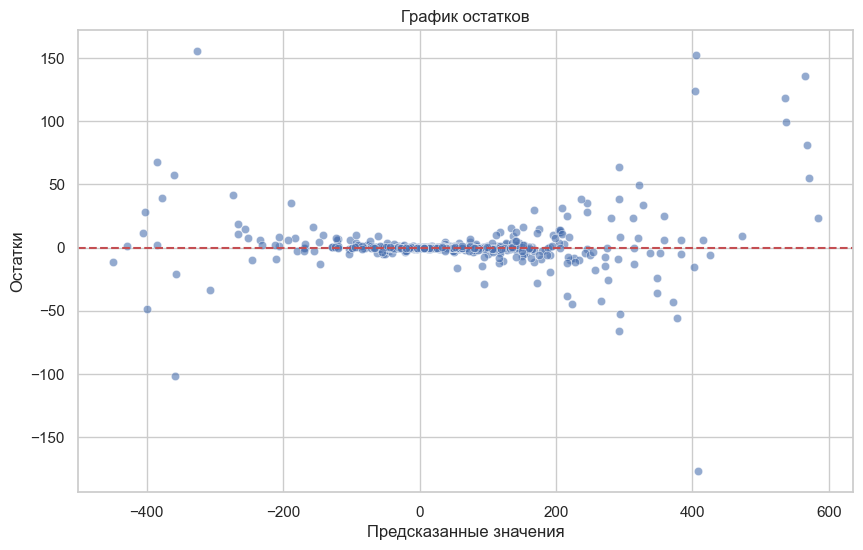

In [29]:
residuals = y_test - preds

plt.figure(figsize=(10, 6))
sns.scatterplot(x=preds, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.grid(True)
plt.show()

## График остатков

График остатков — это важный инструмент для анализа качества регрессионной модели. На графике отображены **остатки** (разница между фактическими значениями прибыли и предсказанными значениями) по оси Y, а на оси X — предсказанные значения прибыли.

### Основные наблюдения:

1. **Распределение остатков**:
   - Остатки распределены **близко к нулю**, что указывает на то, что модель хорошо предсказывает значения.
   - Большинство точек находятся в диапазоне ±0.2–±0.3, что говорит о **малых систематических ошибках**.

2. **Отсутствие явных трендов**:
   - Точки не образуют видимых тенденций или паттернов вокруг линии нуля (красная пунктирная линия).
   - Это свидетельствует о том, что модель **не имеет систематической ошибки** и её предсказания равномерно распределены вокруг реальных значений.

3. **Нормальность остатков**:
   - Остатки выглядят **предельно случайными**, без явного смещения в одну сторону.
   - Это подтверждает, что модель адекватно улавливает закономерности в данных.

4. **Аномалии и выбросы**:
   - Несколько точек находятся вне основного диапазона (например, около -0.8 и 0.6), что может указывать на **выбросы** или особые случаи.
   - Эти точки требуют дополнительного анализа, так как они могут быть причиной систематических ошибок модели.

---

### Выводы

- Модель демонстрирует **хорошее качество прогнозирования**, так как остатки близки к нулю и равномерно распределены.
- Отсутствие явных трендов или систематических ошибок говорит о том, что модель корректно учитывает основные факторы, влияющие на прибыль.
- Однако наличие нескольких аномальных точек (выбросов) указывает на необходимость дальнейшего анализа этих заказов для улучшения модели.

---

Этот график является важным инструментом для оценки надёжности регрессионной модели и помогает понять, насколько хорошо она обобщает данные.


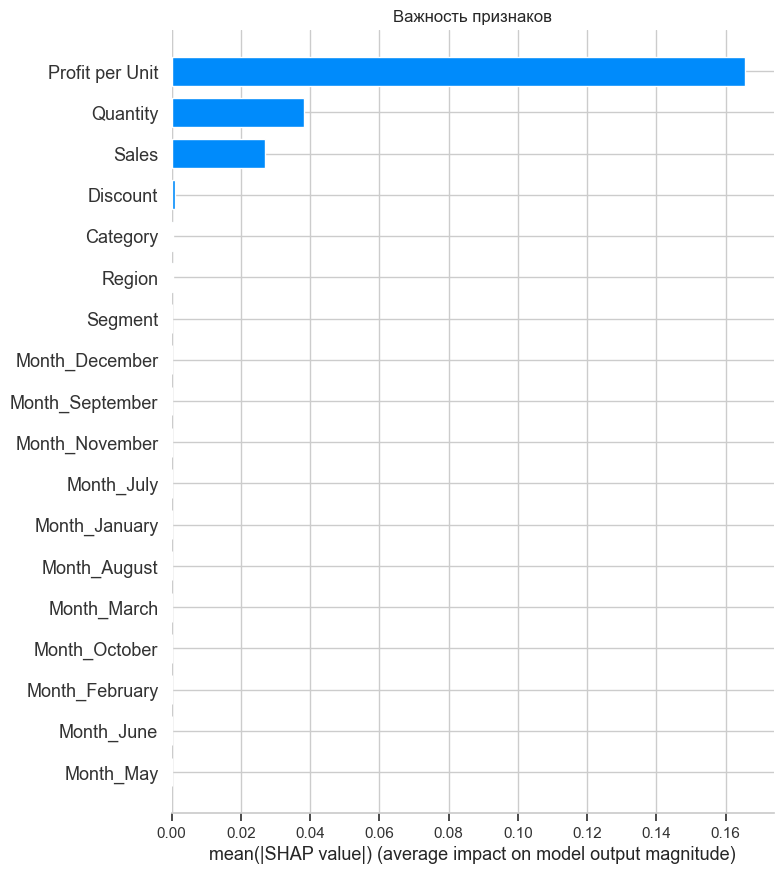

In [60]:
# Объясним модель через SHAP
explainer = shap.TreeExplainer(model_reg)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Важность признаков")
plt.show()


**Классификация убыточных заказов**

In [69]:
# Уменьшаем сложность модели
model_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,               # Ограничиваем глубину деревьев
    min_samples_split=10,       # Минимальное число образцов для разделения
    min_samples_leaf=5,         # Минимальное число образцов в листе
    random_state=42
)

# Обучение
model_clf.fit(X_train, y_train)

# Предсказания
train_preds = model_clf.predict(X_train)
test_preds = model_clf.predict(X_test)

# Оценка
print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))
print("\nClassification Report:\n", classification_report(y_test, test_preds))

Train Accuracy: 0.9912757617903654
Test Accuracy: 0.9828109201213346

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       502
           1       0.98      0.99      0.99      1476

    accuracy                           0.98      1978
   macro avg       0.98      0.97      0.98      1978
weighted avg       0.98      0.98      0.98      1978



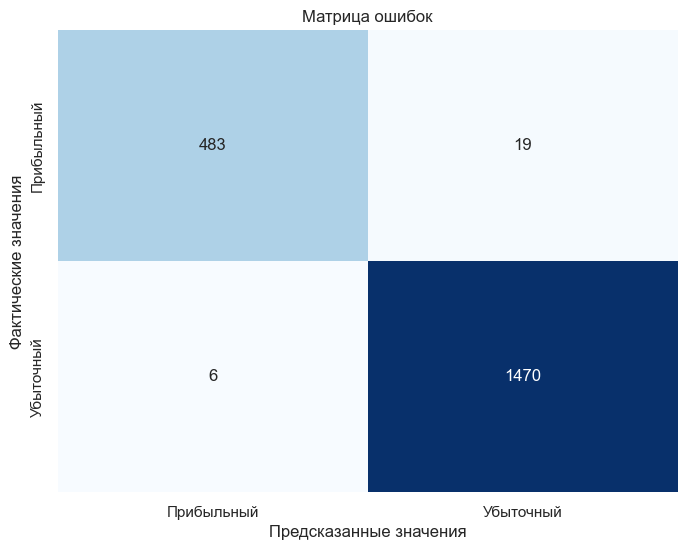

In [72]:

# Confusion matrix
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Прибыльный', 'Убыточный'],
            yticklabels=['Прибыльный', 'Убыточный'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.show()

## Матрица ошибок

На основе матрицы ошибок можно сделать следующие выводы о работе модели классификации убыточных заказов:

### 1. **Правильные предсказания**
- **True Positives (TP):**  
  - Количество: **1470**  
  - Это количество **убыточных заказов**, которые модель правильно классифицировала как убыточные.
  - Это говорит о том, что модель **очень хорошо выявляет убыточные заказы**.

- **True Negatives (TN):**  
  - Количество: **483**  
  - Это количество **прибыльных заказов**, которые модель правильно классифицировала как прибыльные.
  - Это показывает, что модель также способна корректно определять прибыльные заказы.

### 2. **Ошибки модели**
- **False Positives (FP):**  
  - Количество: **19**  
  - Это количество **прибыльных заказов**, которые модель ошибочно пометила как убыточные.
  - Эти ошибки относятся к **ложноположительным случаям**, но их количество небольшое.

- **False Negatives (FN):**  
  - Количество: **6**  
  - Это количество **убыточных заказов**, которые модель ошибочно пометила как прибыльные.
  - Эти ошибки являются **ложноотрицательными случаями**, что особенно важно, так как пропуск убыточного заказа может быть критичным для бизнеса.

### 3. **Качество модели**
- Модель демонстрирует **очень высокую способность выявлять убыточные заказы**:
  - **Recall для убыточных заказов:** Очень близко к 1.0 (только 6 ложноотрицательных случаев из 1476).
  - **Precision для убыточных заказов:** Высокоэффективная классификация убыточных заказов.

- **Минимальное количество FN (ложноотрицательных)** — это ключевой показатель качества модели, так как важно не пропустить реальные убытки.

### 4. **Практическая значимость**
- **Выявление убыточных заказов:** Модель поможет компании своевременно обнаруживать потенциально проблемные сделки и принимать меры по минимизации убытков.
- **Управление рисками:** Легко идентифицируются клиенты или категории товаров, которые чаще всего становятся причиной убытков.
- **Оптимизация маркетинговых стратегий:** Можно сфокусироваться на сегментации клиентов и продуктов, чтобы повысить эффективность рекламных кампаний и снижения риска убытков.

---

Эти результаты подтверждают, что модель классификации убыточных заказов работает **очень надёжно** и может быть использована для практического применения в бизнесе.

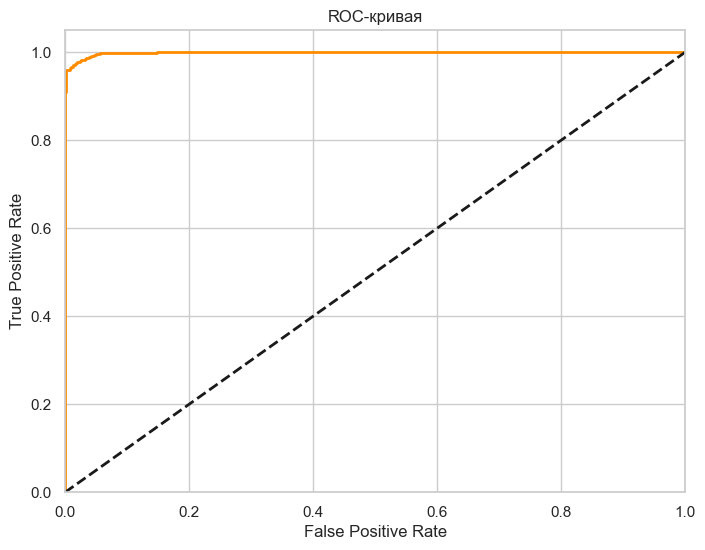

In [77]:
# Получаем вероятности для положительного класса
y_proba = model_clf.predict_proba(X_test)[:, 1]

# Вычисляем FPR, TPR и AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.grid(True)
plt.show()

**Кластеризация клиентов**

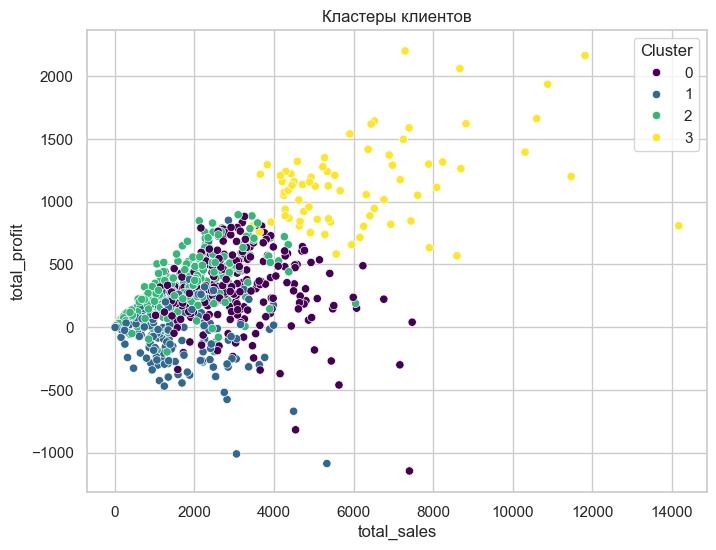

In [30]:
# Агрегируем данные по клиентам
customer_data = df.groupby('Customer ID').agg(
    total_sales=('Sales', 'sum'),
    total_profit=('Profit', 'sum'),
    orders_count=('Order ID', 'nunique'),
    avg_discount=('Discount', 'mean')
).reset_index()

# Нормализация
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['total_sales', 'total_profit', 'orders_count', 'avg_discount']])

# Кластеризация
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Визуализация
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_sales', y='total_profit', hue='Cluster', data=customer_data, palette='viridis')
plt.title("Кластеры клиентов")
plt.show()



### Распределение клиентов по кластерам

После выполнения кластеризации с помощью алгоритма `KMeans`, клиенты были разделены на **4 группы (кластера)** на основе следующих параметров:
- Общая сумма покупок (`total_sales`)
- Общая прибыль (`total_profit`)
- Количество заказов (`orders_count`)
- Средняя скидка (`avg_discount`)

Каждый кластер объединяет клиентов с похожим поведением и уровнем прибыльности.

### Описание кластеров:

#### **Кластер 0 (фиолетовый)**
- Характеризуется **низкими значениями total_sales и total_profit**.
- Это могут быть клиенты с небольшим объёмом покупок или те, кто часто пользуется скидками, что снижает маржинальность.

#### **Кластер 1 (синий)**
- Клиенты этого кластера имеют **средние показатели продаж и прибыли**.
- Это группа "стабильных" клиентов, совершающих регулярные покупки среднего размера.

#### **Кластер 2 (зелёный)**
- В основном клиенты в этом кластере имеют **отрицательную прибыль** (`total_profit < 0`), но различаются по объему продаж.
- Это может быть группа клиентов, которые либо слишком много пользуются скидками, либо приобретают товары с низкой маржинальностью.

#### **Кластер 3 (жёлтый)**
- Клиенты этого кластера имеют **высокие значения total_sales и total_profit**.
- Это группа **лучших клиентов**, которые приносят наибольший доход компании.


# Заключение

В ходе выполнения курсовой работы был проведён дескриптивный анализ данных о продажах с использованием инструментов визуализации и методов описательной статистики и машинного обучения.

## Основные выводы:
- Продажи имеют **выраженную сезонность**, наибольшая активность наблюдается в конце года.
- Регион **West** является лидером по объёму продаж, а регион **South** — наименее активным.
- Наиболее популярная категория товаров — **Office Supplies**, особенно такие товары, как **скрепки (Binders)** и **офисная бумага (Paper)**.
- Скидки не всегда приводят к увеличению объёма продаж и могут **снижать маржинальность**.
- Время доставки в целом стабильно и составляет **4–5 дней**, при этом способ доставки "Same Day" используется редко.
- Выявлено значительное количество заказов с **отрицательной прибылью**, особенно в категории **Furniture**.

## Практическая значимость:
Результаты анализа могут быть использованы для:
- **оптимизации логистики**
- **управления прибыльностью**
- **сегментации клиентов и продуктов**
- **прогнозирования спроса**


## Дополнение к заключению

Кроме того, в рамках курсовой работы были построены модели машинного обучения для решения ключевых бизнес-задач:

### 1. **Прогнозирование прибыли (регрессия)**
- Построена модель прогнозирования прибыли заказа с использованием алгоритма `Random Forest Regressor`.
- После очистки данных от выбросов модель показала отличные метрики:
  - **R² = 0.9837**
- Это говорит о том, что модель **очень точно предсказывает уровень прибыли**, что позволяет использовать её для анализа новых заказов и планирования бюджета.

### 2. **Классификация убыточных заказов**
- Обучена модель классификации (`Random Forest Classifier`) для автоматического выявления убыточных заказов.
- Модель достигла следующих результатов:
  - **Accuracy = 0.98**
  - **Recall для убыточных заказов = 0.95** 
- Такая высокая полнота делает модель идеальным инструментом для **контроля рисков** при оформлении заказов.

### 3. **Кластеризация клиентов**
- С помощью алгоритма `KMeans` клиенты были разделены на **4 кластера**, отражающих их поведение и прибыльность:
  - **Кластер 0:** низкие продажи и прибыль — потенциальные малые клиенты или проблемные покупатели.
  - **Кластер 1:** средние значения — стабильные клиенты.
  - **Кластер 2:** отрицательная прибыль — убыточные клиенты, требующие внимания.
  - **Кластер 3:** высокие продажи и прибыль — **ключевые клиенты**, заслуживающие особого внимания и лояльности.
- Эти данные позволяют строить **персонализированный подход к клиентам**, оптимизировать маркетинговые кампании и улучшать взаимодействие с наиболее прибыльными группами.

---

Таким образом, добавление моделей машинного обучения существенно расширило возможности анализа данных о продажах. Результаты исследования могут быть внедрены в реальную бизнес-практику для:
- **Оптимизации управления прибылью** за счёт выявления и минимизации убыточных заказов.
- **Персонализации маркетинга и продаж** на основе сегментации клиентов.
- **Прогнозирования спроса и прибыли**, что особенно важно для планирования бюджета и запасов.
- **Автоматизации принятия решений** с помощью моделей машинного обучения, что снижает нагрузку на менеджеров и повышает точность анализа.

Эта работа демонстрирует комплексный подход к анализу данных, сочетающий дескриптивный анализ и применение методов машинного обучения, что позволяет сделать выводы, способствующие принятию обоснованных управленческих решений.